In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
rows, cols = df.shape
print(f"The dataset is composed of {rows} rows and {cols} columns.")

The dataset is composed of 5110 rows and 12 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

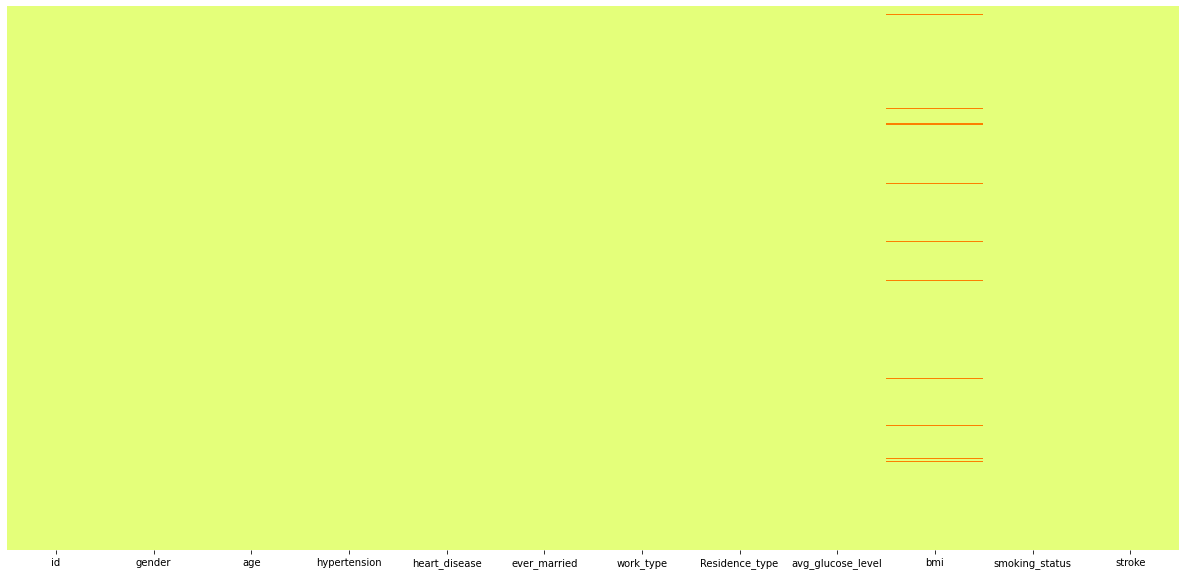

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (21,10))


sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
plt.show()
     

In [ ]:
# get categorical data having multiple labels
categorical = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
categorical_df = pd.DataFrame()
for categorical_feature in categorical:
    tmp_df = pd.DataFrame({categorical_feature:df[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df.head()


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0.0,1.0,Yes,Private,Urban,formerly smoked
1,Female,1.0,0.0,No,Self-employed,Rural,never smoked
2,Other,NaN,NaN,NaN,Govt_job,NaN,smokes
3,NaN,NaN,NaN,NaN,children,NaN,Unknown
4,NaN,NaN,NaN,NaN,Never_worked,NaN,NaN


In [ ]:
X = df.drop(labels=["stroke"], axis=1)
Y = df["stroke"]

X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


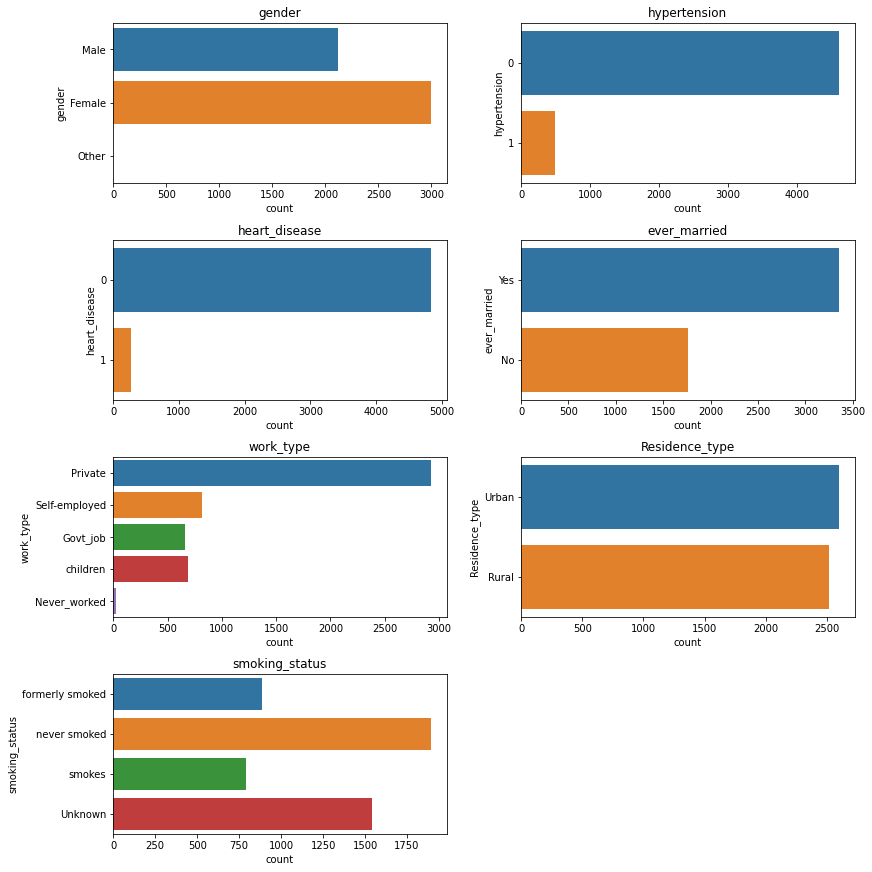

In [ ]:
all_categories = categorical

fig, ax = plt.subplots(4, 2, figsize=(12,5), constrained_layout=True)
fig.delaxes(ax[3,1])
fig.set_figheight(12)
for i, cat_var in enumerate(all_categories):
    try:
        j,k = np.unravel_index(i, shape= (4, 2))
        cp = sns.countplot(y=cat_var, data=X, label='features', ax=ax[j,k])
        ax[j,k].set_title(cat_var)
    except Exception as e:
        print(e)
plt.show()

Text(0.5, 1.0, 'smoking_status: frequency with stroke')

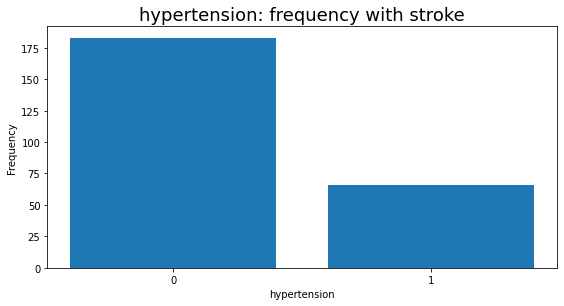

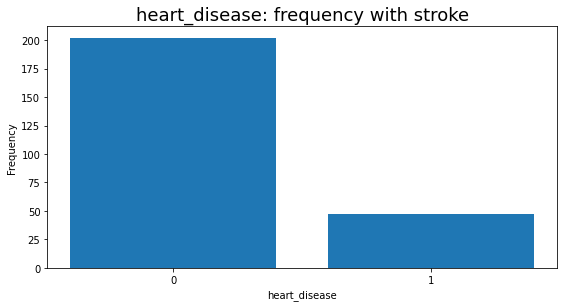

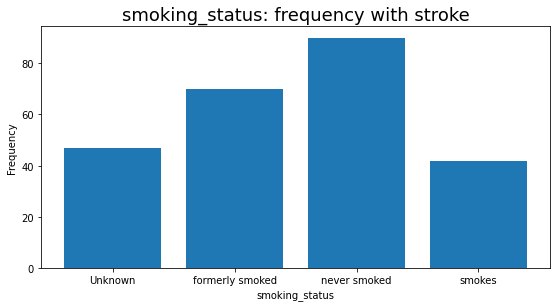

In [ ]:
hypertensionsWithStroke = df[df["stroke"]==1].groupby("hypertension")["hypertension"].count().reset_index(name='counts')
hypertensionsWithoutStroke = df[df["stroke"]==0].groupby("hypertension")["hypertension"].count().reset_index(name='counts')

plt.figure(figsize = (21,16))
grid = plt.GridSpec(3, 2, wspace =0.3, hspace = 0.3) # grid with 3 rows and 2 columns


# plot hypertension frequency with stroke
plt.subplot(grid[0, 0])
plot = plt.bar(hypertensionsWithStroke["hypertension"].values, hypertensionsWithStroke["counts"].values)
plt.ylabel("Frequency")
plt.xlabel("hypertension")
plt.xticks(np.arange(0, 2, 1))
plt.title("hypertension: frequency with stroke", size=18)


heartDiseaseWithStroke = df[df["stroke"]==1].groupby("heart_disease")["heart_disease"].count().reset_index(name='counts')
#heartDiseaseWithoutStroke = df[df["stroke"]==0].groupby("heart_disease")["heart_disease"].count().reset_index(name='counts')

plt.figure(figsize = (21,16))
#grid = plt.GridSpec(3, 2, wspace =0.3, hspace = 0.3) # grid with 3 rows and 2 columns

# plot heart_disease frequency with stroke
plt.subplot(grid[0, 1])
plot = plt.bar(heartDiseaseWithStroke["heart_disease"].values, heartDiseaseWithStroke["counts"].values)
plt.ylabel("Frequency")
plt.xlabel("heart_disease")
plt.xticks(np.arange(0, 2, 1))
plt.title("heart_disease: frequency with stroke", size=18)

smokeWithStroke = df[df["stroke"]==1].groupby("smoking_status")["smoking_status"].count().reset_index(name='counts')
smokeWithoutStroke = df[df["stroke"]==0].groupby("smoking_status")["smoking_status"].count().reset_index(name='counts')

plt.figure(figsize = (21,16))
grid = plt.GridSpec(3, 2, wspace =0.3, hspace = 0.3) # grid with 3 rows and 2 columns

# plot smoking_status frequency with stroke
plt.subplot(grid[0, 0])
plot= plt.bar(smokeWithStroke["smoking_status"].values, smokeWithStroke["counts"].values)
plt.ylabel("Frequency")
plt.xlabel("smoking_status")
plt.title("smoking_status: frequency with stroke", size=18)







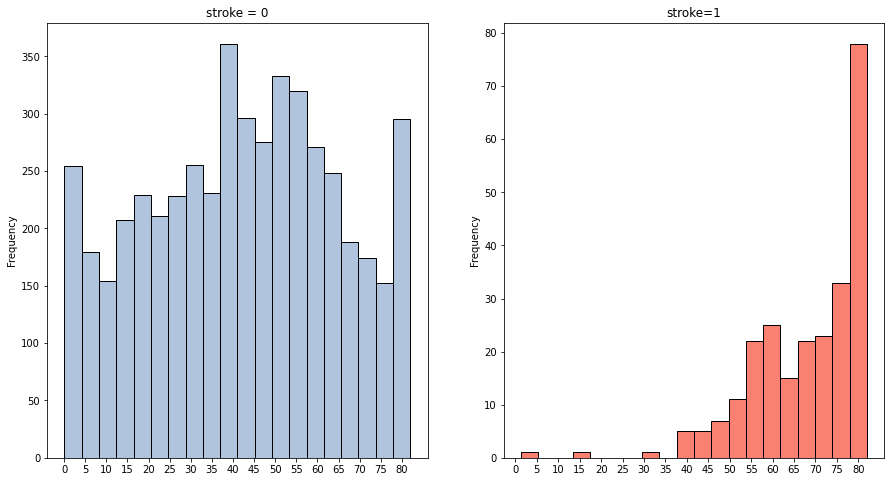

In [ ]:
# age vs stroke
f,ax = plt.subplots(1,2, figsize=(15,8));

df.loc[df['stroke'] ==0]['age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue');
ax[0].set_title('stroke = 0');
ax1 = list(range(0, 85, 5));
ax[0].set_xticks(ax1);

df[df['stroke']==1]['age'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black');
ax[1].set_title('stroke=1');
x2=list(range(0, 85, 5));
ax[1].set_xticks(x2);
plt.show();

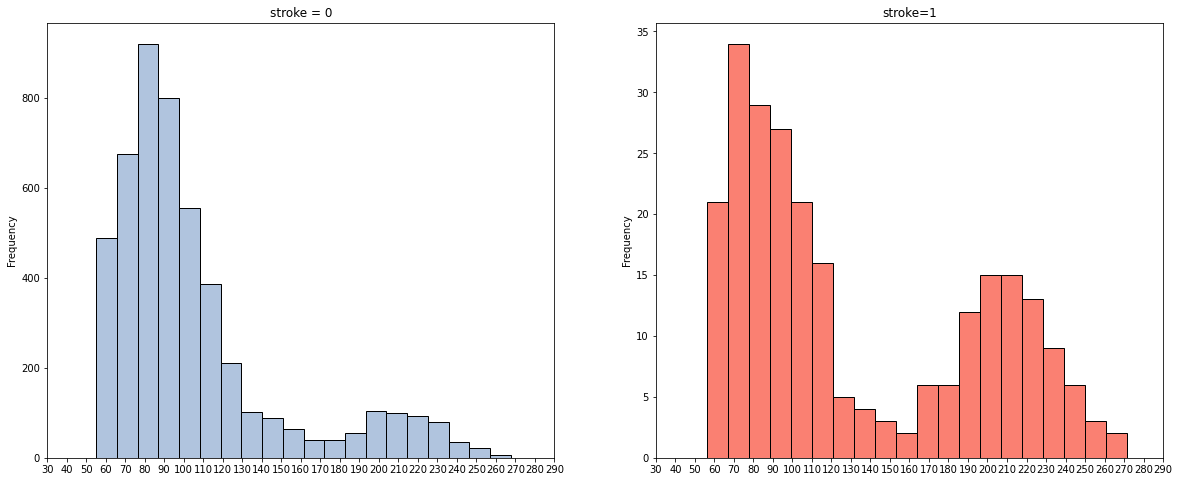

In [ ]:
# avg_glucose_level vs stroke

f,ax = plt.subplots(1,2, figsize=(20,8))

df.loc[df['stroke'] ==0]['avg_glucose_level'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(30, 300, 10))
ax[0].set_xticks(ax1)

df.loc[df['stroke']==1]['avg_glucose_level'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(30, 300, 10))
ax[1].set_xticks(x2)
plt.show()

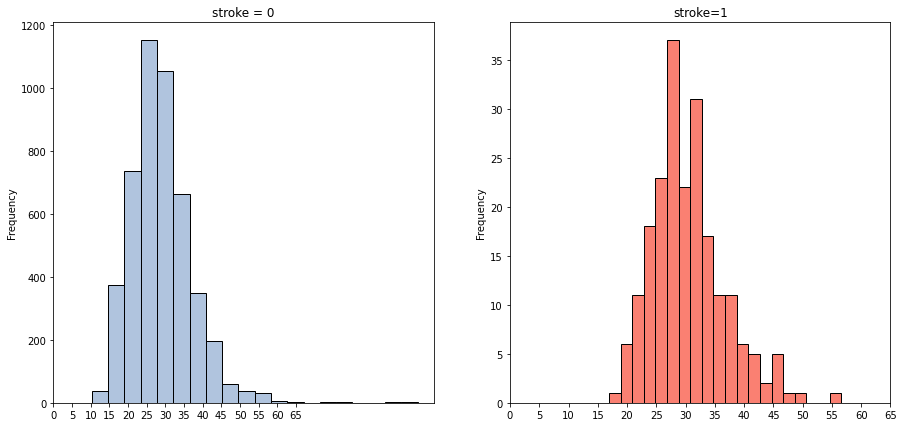

In [ ]:
# bmi vs stroke
f,ax = plt.subplots(1,2, figsize=(15,7))

df.loc[df['stroke'] ==0]['bmi'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 70, 5))
ax[0].set_xticks(ax1)

df.loc[df['stroke']==1]['bmi'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(0, 70, 5))
ax[1].set_xticks(x2)
plt.show()

In [ ]:
total_males=(df["gender"]=="Male").sum()
total_female=(df["gender"]=="Female").sum()
print("total Males:",total_males)
print("total Females:",total_female)

total Males: 2115
total Females: 2994


In [ ]:
no_female_stroke=(df[(df['gender']=="Female") & (df['stroke']==1)])
no_female_stroke = no_female_stroke.count()["id"]
print("total females with Stroke:",no_female_stroke)

total females with Stroke: 141


In [ ]:
no_male_stroke=(df[(df['gender']=="Male") & (df['stroke']==1)])
no_male_stroke = no_male_stroke.count()["id"]
print("total males with Stroke:",no_male_stroke)

total males with Stroke: 108


In [ ]:
print(f"Total number have Stroke:\t  {no_male_stroke+no_female_stroke}")

Total number have Stroke:	  249


In [ ]:
#data preprocess and replce missing bmi according to their age

max_age = df["age"].max()
group_size = round(max_age/4)
group_size



20

In [ ]:
age1 = df.groupby(df['age'].between(0, group_size, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')
bmi_mean1 = round(age1[age1["age"]==True]["bmi_mean"].iloc[0], 1) # get bmi mean of true rows
bmi_mean1
     

<ipython-input-21-b29813835204>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age1 = df.groupby(df['age'].between(0, group_size, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')


22.2

In [ ]:
age2 = df.groupby(df['age'].between(group_size+1, group_size*2, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')
bmi_mean2 = round(age2[age2["age"]==True]["bmi_mean"].iloc[0], 1) # get bmi mean of true rows
bmi_mean2

<ipython-input-22-2aebc407fd5b>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age2 = df.groupby(df['age'].between(group_size+1, group_size*2, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')


30.0

In [ ]:
age3 = df.groupby(df['age'].between(group_size*2+1, group_size*3, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')
bmi_mean3 = round(age3[age3["age"]==True]["bmi_mean"].iloc[0], 1) # get bmi mean of true rows
bmi_mean3

<ipython-input-23-5053963b5479>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age3 = df.groupby(df['age'].between(group_size*2+1, group_size*3, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')


31.7

In [ ]:
age4 = df.groupby(df['age'].between(group_size*3+1, max_age, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')
bmi_mean4 = round(age3[age4["age"]==True]["bmi_mean"].iloc[0], 1) # get bmi mean of true rows
bmi_mean4
     

<ipython-input-24-aacc169d83a9>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age4 = df.groupby(df['age'].between(group_size*3+1, max_age, inclusive=True))['bmi'].mean().reset_index(name='bmi_mean')


31.7

In [ ]:
new_rows1 = df[((df["age"]>=0) & (df["age"]<=group_size) & (df["bmi"].isna()))].fillna(bmi_mean1)
new_rows2 = df[((df["age"]>=group_size+1) & (df["age"]<=group_size*2) & (df["bmi"].isna()))].fillna(bmi_mean2)
new_rows3 = df[((df["age"]>=group_size*2+1) & (df["age"]<=group_size*3) & (df["bmi"].isna()))].fillna(bmi_mean3)
new_rows4 = df[((df["age"]>=group_size*3+1) & (df["age"]<=max_age) & (df["bmi"].isna()))].fillna(bmi_mean4)

new_rows = new_rows1.append(new_rows2.append(new_rows3.append(new_rows4)))
new_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,22.2,Unknown,1
742,33723,Female,9.00,0,0,No,children,Urban,95.81,22.2,Unknown,0
872,2549,Female,17.00,0,0,No,Private,Rural,83.23,22.2,never smoked,0
1115,809,Male,13.00,0,0,No,children,Urban,71.73,22.2,Unknown,0
1194,542,Female,3.00,0,0,No,children,Urban,79.63,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4684,49894,Female,78.00,1,1,Yes,Private,Rural,206.53,31.7,never smoked,0
4713,2044,Female,70.00,0,1,Yes,Self-employed,Rural,65.68,31.7,Unknown,0
4750,16902,Female,70.00,0,1,Yes,Self-employed,Urban,240.69,31.7,smokes,0
4921,4062,Male,72.00,0,1,Yes,Private,Rural,238.27,31.7,smokes,0


In [ ]:
for index in new_rows.index:
    df.iloc[index] = new_rows.loc[index]

print('Bmi null values:', df['bmi'].isna().sum(), sep=' ')

Bmi null values: 0


In [ ]:

df.drop(columns='id',axis=1,inplace=True)


In [ ]:
duplicate = df.duplicated()
df[duplicate].sum()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
cat_vars = categorical
cat_vars


['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
num_vars = df.select_dtypes(include=['float']).columns.tolist()
num_vars

['age', 'avg_glucose_level', 'bmi']

In [ ]:
#remove other gender



In [ ]:
dataframe_ohe = pd.get_dummies(data=df)
dataframe_ohe


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,31.7,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,31.7,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Visualisation of the corralation  the Numeric conversion
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(fg.corr(),annot = True)
#plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
plt.figure(figsize=(16,12))
# calculating correlation and storing it in a dataframe
cor = dataframe_ohe.corr()
cor.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.339875,0.245257,0.027924,-0.027623,-0.010659,-0.679125,...,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.167766,0.127904,-0.021143,0.021275,-0.004597,-0.164243,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.047326,0.134914,-0.085617,0.085717,-0.003343,-0.114644,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175107,0.131945,-0.054902,0.054580,0.011489,-0.155068,...,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
bmi,0.339875,0.167766,0.047326,0.175107,1.000000,0.049161,0.024078,-0.023743,-0.011853,-0.345509,...,-0.028938,0.205438,0.075895,-0.451818,-0.000665,0.000665,-0.268171,0.107267,0.104853,0.088339


<Figure size 1152x864 with 0 Axes>

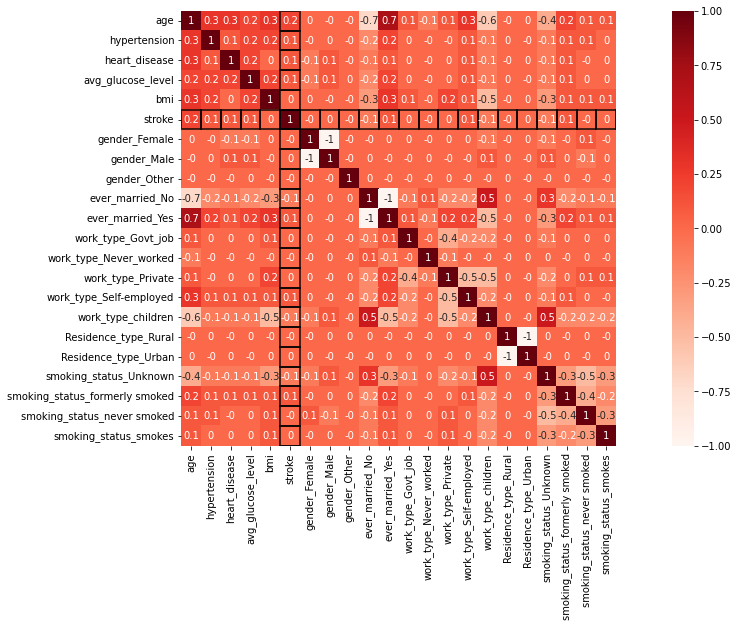

In [ ]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(20,8))
ax = sns.heatmap(cor.round(1), square=True, cmap=plt.cm.Reds, annot=True)
for i in dataframe_ohe.index[dataframe_ohe['stroke'] == True].tolist():
    j = dataframe_ohe.columns.get_loc('stroke')
    ax.add_patch(Rectangle((i, j), 1, 1, ec='black', fc='none', lw=2, alpha=0.7))
    ax.add_patch(Rectangle((j, i), 1, 1, ec='black', fc='none', lw=2, alpha=0.7))
plt.show()

In [ ]:
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
cor_target

age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.049161
stroke                            1.000000
gender_Female                     0.009027
gender_Male                       0.009117
gender_Other                      0.003166
ever_married_No                   0.108340
ever_married_Yes                  0.108340
work_type_Govt_job                0.002677
work_type_Never_worked            0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children                0.083869
Residence_type_Rural              0.015458
Residence_type_Urban              0.015458
smoking_status_Unknown            0.055892
smoking_status_formerly smoked    0.064556
smoking_status_never smoked       0.004129
smoking_status_smokes             0.008939
Name: stroke, dtype: float64

In [ ]:
def summarize_missingness(df):
    '''
    Utility function to summarize missing or NaN values
    '''
    nulls = df.isnull()
    counts = nulls.sum()
    percs = nulls.mean().mul(100.)
    
    nulls_df = pd.DataFrame({'Count of missing/NaN values': counts, 'Percentage of missing values': percs}, 
                            index=counts.index)
    
    display(nulls_df)

In [ ]:
num_vars = df.select_dtypes(include=['float']).columns.tolist()
num_vars

['age', 'avg_glucose_level', 'bmi']

In [ ]:
cat_vars = categorical
cat_vars

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
Other_idx = df.index[df['gender']=="Other"].tolist()
dataframe_cleaned = df.drop(Other_idx)
dataframe_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,31.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
categorical = categorical

categorical_df = pd.DataFrame()
for categorical_feature in categorical:
    tmp_df = pd.DataFrame({categorical_feature:dataframe_cleaned[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df.fillna("", inplace= True)
categorical_df.head()


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0.0,1.0,Yes,Private,Urban,formerly smoked
1,Female,1.0,0.0,No,Self-employed,Rural,never smoked
2,,,,,Govt_job,,smokes
3,,,,,children,,Unknown
4,,,,,Never_worked,,


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
cat_vars = categorical + ["stroke"]
# intialize output dataframe
dataframe_scaled = pd.DataFrame()

# separate categorical and numerical features into two different dataframes
dataframe_cleaned_cat = dataframe_cleaned[[c for c in dataframe_cleaned.columns if c in cat_vars]]
dataframe_cleaned_num = dataframe_cleaned[[c for c in dataframe_cleaned.columns if c in num_vars]]

# scale numerical values using Standard scalar
scaler = MinMaxScaler()
dataframe_scaled_num = pd.DataFrame(scaler.fit_transform(dataframe_cleaned_num), columns= num_vars)

# reset index of categorical data points (index resets after scaling - difference in scaling comes from removing "Others")
# data points from the dataset
dataframe_cleaned_cat = pd.DataFrame(np.array(dataframe_cleaned_cat), columns = cat_vars)

# concatenating both dataframes
dataframe_scaled = pd.concat([dataframe_scaled_num, dataframe_cleaned_cat], axis= 1)

# converting binary categories to int64 since after passing to array it's transformed to Object
binary_cat = ["hypertension", "heart_disease", "stroke"]
dataframe_scaled[binary_cat] = dataframe_scaled[binary_cat].astype(np.int64)

dataframe_scaled

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,0.816895,0.801265,0.301260,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,0.743652,0.679023,0.245132,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,0.975586,0.234512,0.254296,Male,0,1,Yes,Private,Rural,never smoked,1
3,0.597168,0.536008,0.276060,Female,0,0,Yes,Private,Urban,smokes,1
4,0.963379,0.549349,0.156930,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.975586,0.132167,0.245132,Female,1,0,Yes,Private,Urban,never smoked,0
5105,0.987793,0.323516,0.340206,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5106,0.426270,0.128658,0.232532,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5107,0.621582,0.513203,0.175258,Male,0,0,Yes,Private,Rural,formerly smoked,0


In [ ]:
dataframe_ohe_scaled = pd.get_dummies(data= dataframe_scaled)
dataframe_ohe_scaled

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.801265,0.301260,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.743652,0.679023,0.245132,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0.975586,0.234512,0.254296,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.597168,0.536008,0.276060,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,0.963379,0.549349,0.156930,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.975586,0.132167,0.245132,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5105,0.987793,0.323516,0.340206,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5106,0.426270,0.128658,0.232532,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5107,0.621582,0.513203,0.175258,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
X = dataframe_ohe_scaled.drop("stroke", axis= 1) #Feature Matrix
y = dataframe_ohe_scaled["stroke"] #Target Variable

In [ ]:
for colname in X.select_dtypes(['object', 'float64']):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
discrete_features

age                                True
avg_glucose_level                  True
bmi                                True
hypertension                       True
heart_disease                      True
gender_Female                     False
gender_Male                       False
ever_married_No                   False
ever_married_Yes                  False
work_type_Govt_job                False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
Residence_type_Rural              False
Residence_type_Urban              False
smoking_status_Unknown            False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: bool

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

avg_glucose_level                 0.170928
age                               0.044666
bmi                               0.042149
ever_married_No                   0.007023
hypertension                      0.005975
Residence_type_Rural              0.005969
heart_disease                     0.005897
ever_married_Yes                  0.005207
work_type_children                0.004077
gender_Male                       0.003491
smoking_status_formerly smoked    0.001946
Residence_type_Urban              0.001792
smoking_status_smokes             0.000991
work_type_Govt_job                0.000613
smoking_status_Unknown            0.000353
work_type_Self-employed           0.000000
work_type_Private                 0.000000
gender_Female                     0.000000
smoking_status_never smoked       0.000000
work_type_Never_worked            0.000000
Name: MI Scores, dtype: float64

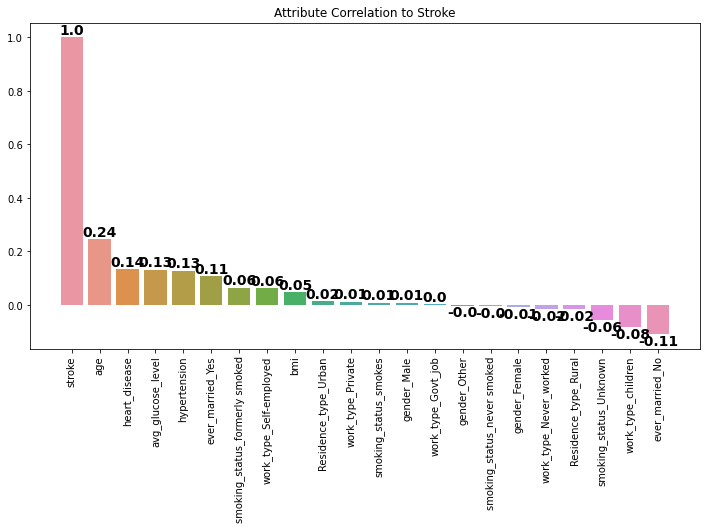

In [ ]:
corr_matrix = cor.round(3)
corr_target = corr_matrix['stroke'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation to Stroke')
plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
    if corr_target[n] >= 0:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
    else:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

In [ ]:
X_filtered = X[["age", "hypertension", "heart_disease", "avg_glucose_level", "ever_married_No", "ever_married_Yes"]]
y = dataframe_ohe_scaled["stroke"]
X_filtered

,age,hypertension,heart_disease,avg_glucose_level,ever_married_No,ever_married_Yes
0,0.816895,0,1,0.801265,0,1
1,0.743652,0,0,0.679023,0,1
2,0.975586,0,1,0.234512,0,1
3,0.597168,0,0,0.536008,0,1
4,0.963379,1,0,0.549349,0,1
...,...,...,...,...,...,...
5104,0.975586,1,0,0.132167,0,1
5105,0.987793,0,0,0.323516,0,1
5106,0.426270,0,0,0.128658,0,1
5107,0.621582,0,0,0.513203,0,1


In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_filtered), np.array(y), test_size=0.30, random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import imblearn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
#metrics
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from numpy import mean
from scipy.stats import uniform
from scipy import interp
from sklearn.utils import class_weight

In [ ]:
model_1 = LogisticRegression(class_weight = 'balanced')

model_1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
predictions_1 = model_1.predict(X_test)

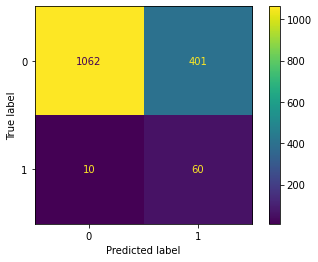

In [ ]:
cm = confusion_matrix(y_test, predictions_1, labels = model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_1.classes_)
disp.plot()

In [ ]:
clf_report = classification_report(y_test, predictions_1)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1463
           1       0.13      0.86      0.23        70

    accuracy                           0.73      1533
   macro avg       0.56      0.79      0.53      1533
weighted avg       0.95      0.73      0.81      1533



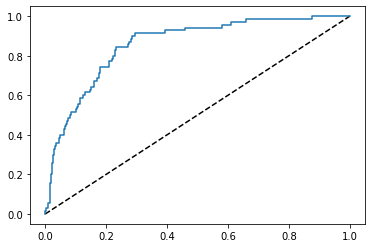

In [ ]:
y_pred_prob = model_1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

0.8569280343716433

In [ ]:
model_2 = RandomForestClassifier()

# Fit 
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions_2 = model_2.predict(X_test)

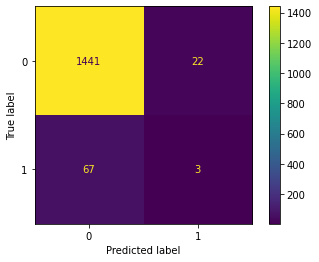

In [ ]:
cm = confusion_matrix(y_test, predictions_2, labels = model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_2.classes_)
disp.plot()

In [ ]:
clf_report = classification_report(y_test, predictions_2)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1463
           1       0.12      0.04      0.06        70

    accuracy                           0.94      1533
   macro avg       0.54      0.51      0.52      1533
weighted avg       0.92      0.94      0.93      1533



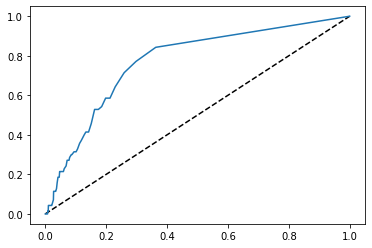

In [ ]:

y_pred_prob = model_2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
model_3 = XGBClassifier()

# Fit 
model_3.fit(X_train, y_train)

XGBClassifier()

In [ ]:
predictions_3 = model_3.predict(X_test)

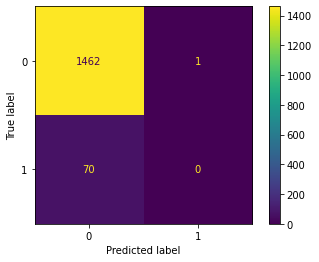

In [ ]:
cm = confusion_matrix(y_test, predictions_3, labels = model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_3.classes_)
disp.plot()

In [ ]:
clf_report = classification_report(y_test, predictions_3)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1463
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



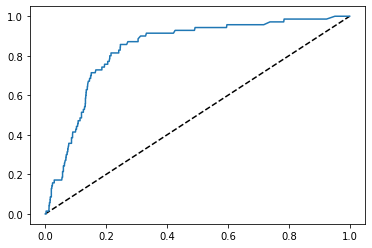

In [ ]:
y_pred_prob = model_3.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=30, random_state=11)
ada.fit(X_train, y_train)



AdaBoostClassifier(learning_rate=0.01, n_estimators=30, random_state=11)

In [ ]:
predictions_4 = ada.predict(X_test)

In [ ]:
clf_report = classification_report(y_test, predictions_4)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1463
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


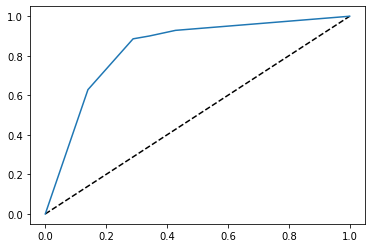

In [ ]:
y_pred_prob = ada.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()